## Introduction

In this activity, I will discover characteristics of a dataset and use visualizations to analyze the data. This will utilize skills in **exploratory data analysis (EDA)** and functions that visualize data. 

In this activity, I will provide insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into **unicorn companies**–companies that are valued at over one billion dollars. The data I used for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. I will use this information to gain insights into how and when companies reach this prestigious milestone and to make recommendations for next steps to the investing firm.

### Import libraries and packages 

First, I import the relevant Python libraries and modules. Use the `pandas` library and the `matplotlib.pyplot` module.

In [1]:
# Import libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Load the dataset into a DataFrame


In [2]:
# Load data from the csv file into a DataFrame and save in a variable

companies = pd.read_csv("Unicorn_Companies.csv")

### Explore the dataset

In [3]:
# Display the first 10 rows of the data

companies.head(10)

Company Valuation Date Joined                             Industry  \
0     Bytedance     $180B      4/7/17              Artificial intelligence   
1        SpaceX     $100B     12/1/12                                Other   
2         SHEIN     $100B      7/3/18      E-commerce & direct-to-consumer   
3        Stripe      $95B     1/23/14                              Fintech   
4        Klarna      $46B    12/12/11                              Fintech   
5         Canva      $40B      1/8/18         Internet software & services   
6  Checkout.com      $40B      5/2/19                              Fintech   
7     Instacart      $39B    12/30/14  Supply chain, logistics, & delivery   
8     JUUL Labs      $38B    12/20/17                    Consumer & retail   
9    Databricks      $38B      2/5/19          Data management & analytics   

            City  Country/Region      Continent  Year Founded Funding  \
0        Beijing           China           Asia          2012     $8B   
1      Hawthorne   United States  North America          2002     $7B   
2       Shenzhen           China           Asia          2008     $2B   
3  San Francisco   United States  North America          2010     $2B   
4      Stockholm          Sweden         Europe          2005     $4B   
5    Surry Hills       Australia        Oceania          2012   $572M   
6         London  United Kingdom         Europe          2012     $2B   
7  San Francisco   United States  North America          2012     $3B   
8  San Francisco   United States  North America          2015    $14B   
9  San Francisco   United States  North America          2013     $3B   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Institutional Venture Partners, Sequoia Capita...  
5  Sequoia Capital China, Blackbird Ventures, Mat...  
6  Tiger Global Management, Insight Partners, DST...  
7  Khosla Ventures, Kleiner Perkins Caufield & By...  
8                            Tiger Global Management  
9  Andreessen Horowitz, New Enterprise Associates...



- The "Select Investors" column represents the top investors in the company.

In [4]:
# How large the dataset is

companies.size

10740


- The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset.

In [5]:
# Shape of the dataset

companies.shape

(1074, 10)


- According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company. 

In [6]:
# Get information


companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB



- `Dtype` is listed as `int64` in the `Year Founded` column. This means that the year a company was founded is represented as an integer. I will need to switch this to datetime.

- `Dtype` is listed as `object` for the `Date Joined` column. This means that the date a company became a unicorn is represented as an object, another issue. 

## Find descriptive statistics

In [7]:
### Get descriptive statistics

companies.describe()

Year Founded
count   1074.000000
mean    2012.895717
std        5.698573
min     1919.000000
25%     2011.000000
50%     2014.000000
75%     2016.000000
max     2021.000000

- The minimum value in the `Year Founded` column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.


- The maximum value in the `Year Founded` column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

In [8]:
# Use pd.to_datetime() to convert Date Joined column to datetime 
# Update the column with the converted values

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [9]:
# Use .info() to confirm that the update actually took place

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [10]:
# I am going to create a year joined column. Use .dt.year to extract year component from Date Joined column
# Add the result as a new column named Year Joined to the DataFrame

companies["Year Joined"] = companies["Date Joined"].dt.year

In [11]:
# Use .head() to confirm that the new column did get added

companies.head()

Company Valuation Date Joined                         Industry  \
0  Bytedance     $180B  2017-04-07          Artificial intelligence   
1     SpaceX     $100B  2012-12-01                            Other   
2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
3     Stripe      $95B  2014-01-23                          Fintech   
4     Klarna      $46B  2011-12-12                          Fintech   

            City Country/Region      Continent  Year Founded Funding  \
0        Beijing          China           Asia          2012     $8B   
1      Hawthorne  United States  North America          2002     $7B   
2       Shenzhen          China           Asia          2008     $2B   
3  San Francisco  United States  North America          2010     $2B   
4      Stockholm         Sweden         Europe          2005     $4B   

                                    Select Investors  Year Joined  
0  Sequoia Capital China, SIG Asia Investments, S...         2017  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...         2012  
2  Tiger Global Management, Sequoia Capital China...         2018  
3        Khosla Ventures, LowercaseCapital, capitalG         2014  
4  Institutional Venture Partners, Sequoia Capita...         2011

## Results and evaluation

In [12]:
# Sample the data

companies_sample = companies.sample(n = 50, random_state = 42)

In [13]:
# Prepare data for plotting

# Create new `years_till_unicorn` column 
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

years_till_unicorn
Industry                                               
Consumer & retail                                     1
Auto & transportation                                 2
Artificial intelligence                               5
Data management & analytics                           8
Mobile & telecommunications                           9
Supply chain, logistics, & delivery                  12
Internet software & services                         13
Other                                                15
E-commerce & direct-to-consumer                      18
Cybersecurity                                        19
Fintech                                              21
Health                                               21

Now, create a bar plot.

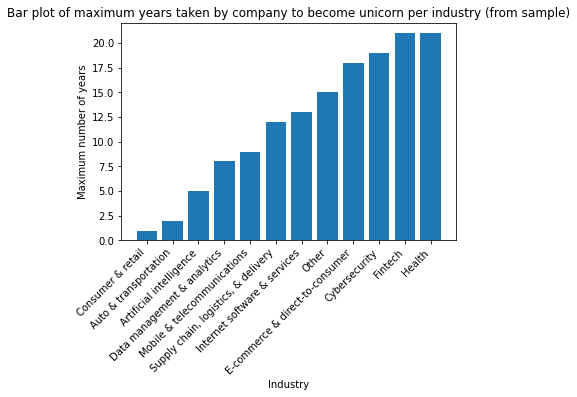

In [14]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars

plt.bar(grouped.index, grouped["years_till_unicorn"])

# Set title


plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label

plt.xlabel("Industry")

# Set y-axis label

plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

plt.show()

- This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

In [15]:
# Create a column representing company valuation as numeric data

# Create new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

Company Valuation Date Joined                         Industry  \
542             Aiven       $2B  2021-10-18     Internet software & services   
370  Jusfoun Big Data       $2B  2018-07-09      Data management & analytics   
307        Innovaccer       $3B  2021-02-19                           Health   
493           Algolia       $2B  2021-07-28     Internet software & services   
350   SouChe Holdings       $3B  2017-11-01  E-commerce & direct-to-consumer   

              City Country/Region      Continent  Year Founded Funding  \
542       Helsinki        Finland         Europe          2016   $210M   
370        Beijing          China           Asia          2010   $137M   
307  San Francisco  United States  North America          2014   $379M   
493  San Francisco  United States  North America          2012   $334M   
350       Hangzhou          China           Asia          2012     $1B   

                                      Select Investors  Year Joined  \
542  Institutional Venture Partners, Atomico, Early...         2021   
370    Boxin Capital, DT Capital Partners, IDG Capital         2018   
307  M12, WestBridge Capital, Lightspeed Venture Pa...         2021   
493               Accel, Alven Capital, Storm Ventures         2021   
350  Morningside Ventures, Warburg Pincus, CreditEa...         2017   

     years_till_unicorn  valuation_billions  
542                   5                   2  
370                   8                   2  
307                   7                   3  
493                   9                   2  
350                   5                   3

In [16]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

valuation_billions
Industry                                               
Auto & transportation                                 1
Consumer & retail                                     1
Other                                                 2
Supply chain, logistics, & delivery                   2
Cybersecurity                                         3
Health                                                3
Data management & analytics                           4
E-commerce & direct-to-consumer                       4
Internet software & services                          5
Mobile & telecommunications                           7
Fintech                                              10
Artificial intelligence                              12

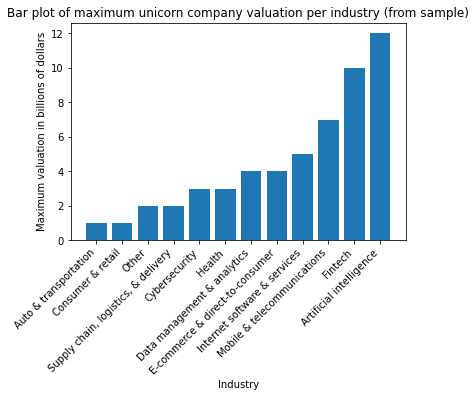

In [17]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars


plt.bar(grouped.index, grouped["valuation_billions"])

# Set title


plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")

# Set x-axis label

plt.xlabel("Industry")

# Set y-axis label

plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot

plt.show()


- This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.

## Considerations

**Findings**

- There are 1074 unicorn companies represented in this dataset.
- Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model. 

**Recommendations**

- Identify the main industries that the investing firm is interested in investing in. 
- Select a subset of this data that includes only companies in those industries. 
- Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in. 

**References**

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 
